In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# Decaimiento radioactivo#

**Modelo matemático**

$\frac{dM}{dt}=kM$

Solucion general:

In [2]:
t= symbols("t")
k=symbols("k")
M= Function("M")
ed= Eq(M(t).diff(),k*M(t))
sol=dsolve(ed,M(t))
sol

Es común conocer la cantidad (inicial) de material existente en $t=0$, lo que se expresa por $M(0)=M_0$.

Con esto podemos calcular la constante C:

In [3]:
Eq0=sol.subs('t',0)
sym.var('M0')
sym.Eq(Eq0,M0)

Entonces tenemos:

In [4]:
sol.subs('C1',M0)

**Esta va a ser la solucion general que nos ayude para sustituir nuestros datos y así poder hallar nuestra solución númerica.**

De esta última expresión observemos que se puede calcular k si conocemos la cantidad de material existente en un tiempo $t_1>0$, digamos $M(t_1)=M_1<M_0$

$M(t_1)=M_1=M_0e^{kt_1} => \frac{M_1}{M_0}=kt_1$

Así concluimos que:

$k=\frac{ln(M_1)-ln(M_0)}{t_1}$

Observaciones:

a)  Un caso en particular ocurre cuando $M(t_1)=\frac{M_0}{2}$. Esto es, se conoce el tiempo que transcurre para que la cantidad de material radioactivo decaiga la mitad. Este tiempo se conoce como la vida media del material radioactivo.En este caso

$M(t_m)=\frac{M_0}{2}=M_0e^{k}{t_m} => \frac{1}{2}=e^{k}{t_m}=> ln(\frac{1}{2})=kt_m$

Entonces: $kt_m=-ln2$,de donde podemos despejar por igual:



$k=\frac{-ln2}{t_m}$ & $t_m=\frac{-ln2}{k}$

Ademas, en vista de lo anterior podemos afirmar que la vida media de un material no depende de la cantidad inicial del mismo.

Si se proporcionan $M(t_1)=M_1$ & $M(t_2)$ para dos tiempos $t_1<t_2$, obtenemos los siguientes resultados:

$M(t_1)=M_1=Ce^{kt_1}$



$M(t_2)=M_2=Ce^{kt_2}$

Tenemos un sistema de dos ecuaciones con dos incognitas, C y k. Para resolverlo podemos dividir la segunda ecuación entre la primera y así obtenemos:

$\frac{M_2}{M_1}=\frac{Ce^kt_2}{Ce^kt_1}=\frac{e^kt_2}{e^kt_1}=e^{k(t_2-t_1)}$

De donde:
$ln(\frac{M_2}{M_1})=k(t_2-t_1)$

Despejamos:


$k=\frac{lnM_2-lnM_1}{t_2-t_1}$    

Ademas tenemos tambien:

$M_1=Ce^kt_1=>C=M_1e^{-kt_1}$  

Y por tanto al substituir en $M(t)=Ce^{kt}$:

$M(t)=M_1e^{k(t-t_1)}$

En donde k lo obtuvimos de despejarla anteriormente

In [5]:
t= symbols("t")
k=symbols("k")
M= Function("M")
ed= Eq(M(t).diff(),k*M(t))
sol=dsolve(ed,M(t))
sol

Es común conocer la cantidad (inicial) de material existente en $t=0$, lo que se expresa por $M(0)=M_0$.

Con esto podemos calcular la constante C:

In [6]:
Eq0=sol.subs('t',0)
sym.var('M0')
sym.Eq(Eq0,M0)

Entonces tenemos:

In [7]:
sol.subs('C1',M0)

In [8]:
n=sol.subs("C1",M0)
n

De esta última expresión observemos que se puede calcular k si conocemos la cantidad de material existente en un tiempo $t_1>0$, digamos $M(t_1)=M_1<M_0$

$M(t_1)=M_1=M_0e^kt_1 => \frac{M_1}{M_0}$

In [9]:
def k(M0,i,t):
    perdida=(M0*i)/100
    M1=M0-perdida
    M2=M1/M0
    k=np.log(M2)/t
    Mt=M0*np.exp(k*t)
    return k

**En nuestro problema tenemos una masa de 100 miligramos que despues de dos años disminuye su masa 5%. Con estos valores obtenemos la masa despues de los dos años que es de 95 miligramos y despues sacamos nuestra k (constante de proporcionalidad), esta nos queda de -0.02564**

In [10]:
M0=100
i=5
t=2
k=k(M0,i,t)
k

**Utilizamos el modelo de Decaimiento radioactivo para saber cuantos años tienen que transcurrir para que la masa desintegre el porcentaje que especifiquemos, en este caso buscamos el tiempo transcurrido para que la masa se desintegre 12%**

In [11]:
def t1(M0,j,k):
    perdida=(M0*i)/100
    M1=M0-perdida
    M2=M1/M0
    t2=(np.log(M2)/k)
    return t2

In [12]:
i=np.linspace(0,12,100) # el 12 en este linspace indica la tasa de desintegración 
j=i[-1]
t2=t1(M0,i,k)
perdida=(M0*i)/100
M1=M0-perdida
print('Tenemos una masa de ', M0,' y queremos que disminuya ',j,'%, lo cual nos dejaria una masa de ',M1[-1],'tienen que pasar ',t2[-1],' años.')

Tenemos una masa de  100  y queremos que disminuya  12.0 %, lo cual nos dejaria una masa de  88.0 tienen que pasar  4.984408704343677  años.


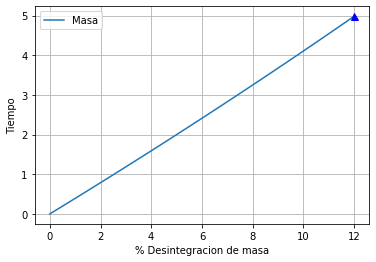

In [13]:
plt.plot(i,t1(M0,j,k),label='Masa')
plt.legend(loc='best')
plt.xlabel('% Desintegracion de masa')
plt.ylabel('Tiempo')
plt.plot(i[-1],t2[-1],"b^",ms=7)
plt.grid()

**En la grafica tenemos nuestro eje x que es el porcentaje en que se desintegra la masa y el eje y es el Tiempo que transcurre**

Conclusiones:


Podemos concluir que la resolucion de la ED modelo de manera simbolica condujo a una buena guía para obtener una solución númerica y también se pudo complementar con una solución gráfica, algunos ejemplos de aplicación de la solución de ese modelo incluyen el fechado de piezas mediante trazas de materiales radioactivos, de gran importancia en arqueología e historia.
